In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [8]:
x_train[9487].shape

(28, 28)

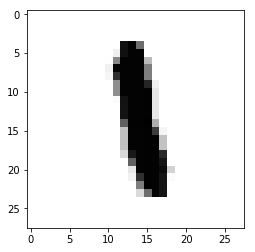

In [9]:
plt.imshow(x_train[9487], cmap='Greys')

In [10]:
y_train[9487]

1

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train,10)

In [15]:
y_test = np_utils.to_categorical(y_test,10)

In [16]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [20]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
784*500+500

392500

In [25]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0821 - acc: 0.3574
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0623 - acc: 0.6438
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0449 - acc: 0.7631
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0334 - acc: 0.8268
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0261 - acc: 0.8682
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0217 - acc: 0.8854
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0189 - acc: 0.8967
Epoch 8/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0171 - acc: 0.9045
Epoch 9/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0157 - acc: 0.9105
Epoch 10/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0146 - acc: 0.9156

In [26]:
predict = model.predict_classes(x_test)

神經網路預測: 7


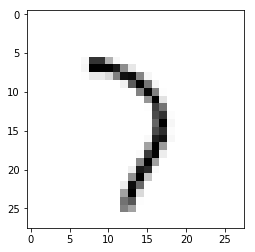

In [30]:
n = 1122

X = x_test[n].reshape(28,28)

plt.imshow(X, cmap='Greys')
print("神經網路預測:", predict[n])

In [31]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [32]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.010788224163558334
測試資料正確率: 0.9334


In [33]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')